In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams.update({'font.size': 14})
from scipy.stats import linregress
from scipy.stats import pearsonr, spearmanr
from scipy.stats import ranksums
from scipy.stats import ttest_ind
from scipy.spatial import distance
from glob import glob
from sklearn.metrics import mean_squared_error

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)

In [3]:
#load info
Patient_Info = pd.read_csv('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/initial_info.csv', index_col=0)

In [4]:
#load initial file
Initial_relative = pd.read_table('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/initial_relative.txt', index_col=0)
Initial_relative.index = Initial_relative.index.map(lambda x: str(x)[:-2])

In [5]:
#load recurrence file
Recurrence_relative = pd.read_table('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/recurrence_relative.txt', index_col=0)
Recurrence_relative.index = Recurrence_relative.index.map(lambda x: str(x)[:-2])

In [6]:
initial_gene = pd.read_csv('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/pairedGlioma.initial.expression.protein_cod.log2RPKM.txt', sep='\t', index_col=0)
initial_gene = initial_gene.T
initial_gene.index = initial_gene.index.map(lambda x: str(x)[:-2])
initial_gene_marker = initial_gene.loc[:,["CD274", "CD276", "TIGIT", "CTLA4", "LAG3"]]
initial_gene_marker

,CD274,CD276,TIGIT,CTLA4,LAG3
PS001,1.472278,4.772543,0.315841,0.173197,0.485652
PS002,2.051646,5.260646,0.485520,0.258477,0.333174
PS003,0.755056,3.928446,0.431292,0.065133,0.464144
PS004,0.684904,5.166042,0.174110,0.022755,1.565530
PS005,1.238825,3.954937,0.792146,0.064946,0.047007
PS006,0.502988,2.321912,0.005377,0.293374,0.144975
PS007,1.252130,3.350190,0.427303,0.033675,0.118028
PS008,0.878521,2.767564,0.261868,0.119189,0.052461
PS009,0.299886,4.144037,0.071344,0.069179,0.778439
PS010,0.515708,3.704749,0.361898,0.000651,0.375432


In [7]:
recurrence_gene = pd.read_csv('/Users/dawonchoi/Documents/HKUST/Y3/Summer/UROP 2200/Initial Recurrence/pairedGlioma.recurrence.expression.protein_cod.log2RPKM.txt', sep='\t', index_col=0)
recurrence_gene = recurrence_gene.T
recurrence_gene.index = recurrence_gene.index.map(lambda x: str(x)[:-2])
recurrence_gene_marker = recurrence_gene.loc[:,["CD274", "CD276", "TIGIT", "CTLA4", "LAG3"]]
recurrence_gene_marker

,CD274,CD276,TIGIT,CTLA4,LAG3
PS001,1.602864,2.933100,0.183388,0.063488,0.090015
PS002,1.469374,3.989884,0.440523,0.125214,0.221634
PS003,1.409281,2.385818,0.270369,0.170619,0.269184
PS004,1.495229,3.964536,0.544729,0.254121,0.391261
PS005,1.752375,3.999686,0.619595,0.042285,0.204907
PS006,1.405626,4.719906,0.040829,0.104881,0.136661
PS007,2.507348,4.906894,2.087847,3.314045,2.789825
PS008,0.913464,3.762504,0.366155,0.025808,0.334855
PS009,0.793171,4.162157,0.095174,0.002205,0.443341
PS010,1.269246,3.091479,0.314219,0.011277,0.226236


In [8]:
common = initial_gene_marker.index.intersection(Patient_Info.index)
common2 = recurrence_gene_marker.index.intersection(Patient_Info.index)
final_common = recurrence_gene_marker.index.intersection(initial_gene_marker.index)
final_common

Index(['PS001', 'PS002', 'PS003', 'PS004', 'PS005', 'PS006', 'PS007', 'PS008',
       'PS009', 'PS010',
       ...
       'PSX20', 'PSX18', 'PSX01', 'PSX14', 'PSX07', 'PSX09', 'PSX08', 'PSX02',
       'PSX05', 'PSX13'],
      dtype='object', length=181)

In [9]:
combined_data = Patient_Info
combined_data = combined_data[combined_data.index.isin(final_common)]
idh = combined_data.loc[:, combined_data.columns == "IDH"]
mutant = combined_data.loc[:, combined_data.columns == "1p19qcodel"]
class_data = idh.join(mutant)
class_data

,IDH,1p19qcodel
Patient_ID,,
PS001,IDHwt,noncodel
PS002,IDHwt,noncodel
PS003,IDHwt,noncodel
PS004,IDHwt,noncodel
PS005,IDHwt,noncodel
PS006,IDHwt,noncodel
PS007,IDHwt,noncodel
PS008,IDHwt,noncodel
PS009,IDHmut,noncodel


In [10]:
#selecting for IDHwt
select = class_data[(class_data['IDH']=="IDHwt")]
class_data.loc[select.index, 'Molecular Class'] = "IDH - wildtype"
class_data

,IDH,1p19qcodel,Molecular Class
Patient_ID,,,
PS001,IDHwt,noncodel,IDH - wildtype
PS002,IDHwt,noncodel,IDH - wildtype
PS003,IDHwt,noncodel,IDH - wildtype
PS004,IDHwt,noncodel,IDH - wildtype
PS005,IDHwt,noncodel,IDH - wildtype
PS006,IDHwt,noncodel,IDH - wildtype
PS007,IDHwt,noncodel,IDH - wildtype
PS008,IDHwt,noncodel,IDH - wildtype
PS009,IDHmut,noncodel,NaN


In [11]:
#selecting for IDH – mutant + noncodel
select2 = class_data[(class_data['IDH']=="IDHmut")&(class_data['1p19qcodel']=="noncodel")]
class_data.loc[select2.index, 'Molecular Class'] = "IDH – mutant (noncodel)"
class_data

,IDH,1p19qcodel,Molecular Class
Patient_ID,,,
PS001,IDHwt,noncodel,IDH - wildtype
PS002,IDHwt,noncodel,IDH - wildtype
PS003,IDHwt,noncodel,IDH - wildtype
PS004,IDHwt,noncodel,IDH - wildtype
PS005,IDHwt,noncodel,IDH - wildtype
PS006,IDHwt,noncodel,IDH - wildtype
PS007,IDHwt,noncodel,IDH - wildtype
PS008,IDHwt,noncodel,IDH - wildtype
PS009,IDHmut,noncodel,IDH – mutant (noncodel)


In [12]:
class_data = class_data.fillna("IDH-mutant (codel)")
class_data

,IDH,1p19qcodel,Molecular Class
Patient_ID,,,
PS001,IDHwt,noncodel,IDH - wildtype
PS002,IDHwt,noncodel,IDH - wildtype
PS003,IDHwt,noncodel,IDH - wildtype
PS004,IDHwt,noncodel,IDH - wildtype
PS005,IDHwt,noncodel,IDH - wildtype
PS006,IDHwt,noncodel,IDH - wildtype
PS007,IDHwt,noncodel,IDH - wildtype
PS008,IDHwt,noncodel,IDH - wildtype
PS009,IDHmut,noncodel,IDH – mutant (noncodel)


In [13]:
#CD274
initial_gene_marker = initial_gene_marker[initial_gene_marker.index.isin(final_common)]
recurrence_gene_marker = recurrence_gene_marker[recurrence_gene_marker.index.isin(final_common)]
initial = initial_gene_marker.loc[:, initial_gene_marker.columns == "CD274"]
initial.columns = ['Initial']
recurrence = recurrence_gene_marker.loc[:, recurrence_gene_marker.columns == "CD274"]
recurrence.columns = ['Recurrent']
CD274_data = initial.join(recurrence)
CD274_final = pd.concat([class_data, CD274_data], axis=1)
CD274_final.index.name = 'Mixture'
CD274_final = CD274_final.drop(['IDH','1p19qcodel'], axis=1)
CD274_final = CD274_final.sort_values(by='Mixture')
CD274_mdf = pd.melt(CD274_final.reset_index(), id_vars=('Mixture','Molecular Class'))
CD274_mdf

,Mixture,Molecular Class,variable,value
0,PS001,IDH - wildtype,Initial,1.472278
1,PS002,IDH - wildtype,Initial,2.051646
2,PS003,IDH - wildtype,Initial,0.755056
3,PS004,IDH - wildtype,Initial,0.684904
4,PS005,IDH - wildtype,Initial,1.238825
5,PS006,IDH - wildtype,Initial,0.502988
6,PS007,IDH - wildtype,Initial,1.252130
7,PS008,IDH - wildtype,Initial,0.878521
8,PS009,IDH – mutant (noncodel),Initial,0.299886
9,PS010,IDH - wildtype,Initial,0.515708


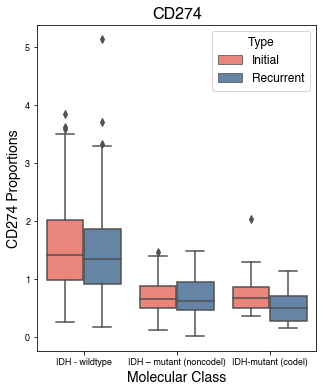

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
colors = ["#FC766AFF","#5B84B1FF"]
sns.set_palette(sns.color_palette(colors))

plt.figure(figsize=(5,6))
plt.title("CD274", fontsize=16)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
ax = sns.boxplot(x='Molecular Class', y='value',hue="variable", data=CD274_mdf)
ax.set_xlabel("Molecular Class", fontsize=14)
ax.set_ylabel("CD274 Proportions", fontsize=14)  
ax.legend(loc='upper right', fontsize=12,title='Type',title_fontsize=12,borderpad=.5, labelspacing=.5)

In [15]:
m_class = ['IDH - wildtype','IDH – mutant (noncodel)','IDH-mutant (codel)']

for p in m_class:
    specific_progression = CD274_mdf.loc[CD274_mdf['Molecular Class'] == p]
    first = specific_progression.loc[specific_progression['variable'] == 'Initial']
    second = specific_progression.loc[specific_progression['variable'] == 'Recurrent']
    print(p)
    print('Between Initial and Recurrence: ')
    print(ranksums(first.iloc[:,3], second.iloc[:,3]))
    print ('--------------------------------')

IDH - wildtype
Between Initial and Recurrence: 
RanksumsResult(statistic=0.7439867664800893, pvalue=0.4568844811634801)
--------------------------------
IDH – mutant (noncodel)
Between Initial and Recurrence: 
RanksumsResult(statistic=0.1755320375205381, pvalue=0.8606615992533566)
--------------------------------
IDH-mutant (codel)
Between Initial and Recurrence: 
RanksumsResult(statistic=1.9299545913634146, pvalue=0.05361246435092914)
--------------------------------


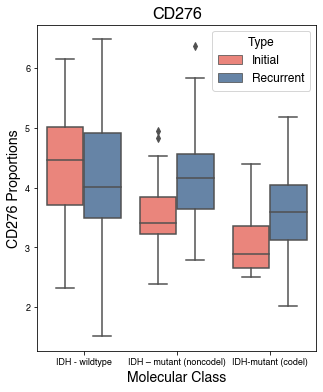

In [16]:
#CD276
initial_gene_marker = initial_gene_marker[initial_gene_marker.index.isin(final_common)]
recurrence_gene_marker = recurrence_gene_marker[recurrence_gene_marker.index.isin(final_common)]
initial = initial_gene_marker.loc[:, initial_gene_marker.columns == "CD276"]
initial.columns = ['Initial']
recurrence = recurrence_gene_marker.loc[:, recurrence_gene_marker.columns == "CD276"]
recurrence.columns = ['Recurrent']
CD276_data = initial.join(recurrence)
CD276_final = pd.concat([class_data, CD276_data], axis=1)
CD276_final.index.name = 'Mixture'
CD276_final = CD276_final.drop(['IDH','1p19qcodel'], axis=1)
CD276_final = CD276_final.sort_values(by='Mixture')
CD276_mdf = pd.melt(CD276_final.reset_index(), id_vars=('Mixture','Molecular Class'))
plt.figure(figsize=(5,6))
plt.title("CD276", fontsize=16)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
ax = sns.boxplot(x='Molecular Class', y='value',hue="variable", data=CD276_mdf)
ax.set_xlabel("Molecular Class", fontsize=14)
ax.set_ylabel("CD276 Proportions", fontsize=14)  
ax.legend(loc='upper right', fontsize=12,title='Type',title_fontsize=12,borderpad=.5, labelspacing=.5)

In [17]:
m_class = ['IDH - wildtype','IDH – mutant (noncodel)','IDH-mutant (codel)']

for p in m_class:
    specific_progression = CD276_mdf.loc[CD276_mdf['Molecular Class'] == p]
    first = specific_progression.loc[specific_progression['variable'] == 'Initial']
    second = specific_progression.loc[specific_progression['variable'] == 'Recurrent']
    print(p)
    print('Between Initial and Recurrence: ')
    print(ranksums(first.iloc[:,3], second.iloc[:,3]))
    print ('--------------------------------')

IDH - wildtype
Between Initial and Recurrence: 
RanksumsResult(statistic=1.9498304863087734, pvalue=0.05119632662002745)
--------------------------------
IDH – mutant (noncodel)
Between Initial and Recurrence: 
RanksumsResult(statistic=-4.284281952816096, pvalue=1.8333030315191386e-05)
--------------------------------
IDH-mutant (codel)
Between Initial and Recurrence: 
RanksumsResult(statistic=-1.9615931912218314, pvalue=0.049809865616516645)
--------------------------------


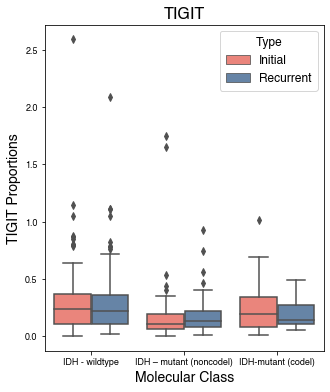

In [18]:
#TIGIT
initial_gene_marker = initial_gene_marker[initial_gene_marker.index.isin(final_common)]
recurrence_gene_marker = recurrence_gene_marker[recurrence_gene_marker.index.isin(final_common)]
initial = initial_gene_marker.loc[:, initial_gene_marker.columns == "TIGIT"]
initial.columns = ['Initial']
recurrence = recurrence_gene_marker.loc[:, recurrence_gene_marker.columns == "TIGIT"]
recurrence.columns = ['Recurrent']
TIGIT_data = initial.join(recurrence)
TIGIT_final = pd.concat([class_data, TIGIT_data], axis=1)
TIGIT_final.index.name = 'Mixture'
TIGIT_final = TIGIT_final.drop(['IDH','1p19qcodel'], axis=1)
TIGIT_final = TIGIT_final.sort_values(by='Mixture')
TIGIT_mdf = pd.melt(TIGIT_final.reset_index(), id_vars=('Mixture','Molecular Class'))
plt.figure(figsize=(5,6))
plt.title("TIGIT", fontsize=16)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
ax = sns.boxplot(x='Molecular Class', y='value',hue="variable", data=TIGIT_mdf)
ax.set_xlabel("Molecular Class", fontsize=14)
ax.set_ylabel("TIGIT Proportions", fontsize=14)  
ax.legend(loc='upper right', fontsize=12,title='Type',title_fontsize=12,borderpad=.5, labelspacing=.5)

In [19]:
m_class = ['IDH - wildtype','IDH – mutant (noncodel)','IDH-mutant (codel)']

for p in m_class:
    specific_progression = TIGIT_mdf.loc[TIGIT_mdf['Molecular Class'] == p]
    first = specific_progression.loc[specific_progression['variable'] == 'Initial']
    second = specific_progression.loc[specific_progression['variable'] == 'Recurrent']
    print(p)
    print('Between Initial and Recurrence: ')
    print(ranksums(first.iloc[:,3], second.iloc[:,3]))
    print ('--------------------------------')

IDH - wildtype
Between Initial and Recurrence: 
RanksumsResult(statistic=0.01985357944258665, pvalue=0.9841601760759432)
--------------------------------
IDH – mutant (noncodel)
Between Initial and Recurrence: 
RanksumsResult(statistic=-0.962175613075542, pvalue=0.33596139702466377)
--------------------------------
IDH-mutant (codel)
Between Initial and Recurrence: 
RanksumsResult(statistic=0.2847473987257497, pvalue=0.7758376742179303)
--------------------------------


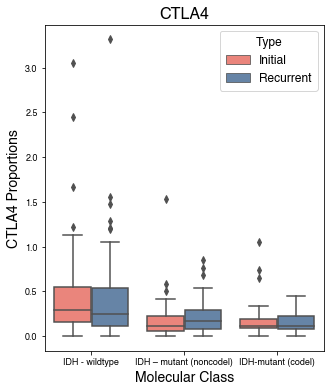

In [20]:
#CTLA4
initial_gene_marker = initial_gene_marker[initial_gene_marker.index.isin(final_common)]
recurrence_gene_marker = recurrence_gene_marker[recurrence_gene_marker.index.isin(final_common)]
initial = initial_gene_marker.loc[:, initial_gene_marker.columns == "CTLA4"]
initial.columns = ['Initial']
recurrence = recurrence_gene_marker.loc[:, recurrence_gene_marker.columns == "CTLA4"]
recurrence.columns = ['Recurrent']
CTLA4_data = initial.join(recurrence)
CTLA4_final = pd.concat([class_data, CTLA4_data], axis=1)
CTLA4_final.index.name = 'Mixture'
CTLA4_final = CTLA4_final.drop(['IDH','1p19qcodel'], axis=1)
CTLA4_final = CTLA4_final.sort_values(by='Mixture')
CTLA4_mdf = pd.melt(CTLA4_final.reset_index(), id_vars=('Mixture','Molecular Class'))
plt.figure(figsize=(5,6))
plt.title("CTLA4", fontsize=16)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
ax = sns.boxplot(x='Molecular Class', y='value',hue="variable", data=CTLA4_mdf)
ax.set_xlabel("Molecular Class", fontsize=14)
ax.set_ylabel("CTLA4 Proportions", fontsize=14)  
ax.legend(loc='upper right', fontsize=12,title='Type',title_fontsize=12,borderpad=.5, labelspacing=.5)

In [21]:
m_class = ['IDH - wildtype','IDH – mutant (noncodel)','IDH-mutant (codel)']

for p in m_class:
    specific_progression = CTLA4_mdf.loc[CTLA4_mdf['Molecular Class'] == p]
    first = specific_progression.loc[specific_progression['variable'] == 'Initial']
    second = specific_progression.loc[specific_progression['variable'] == 'Recurrent']
    print(p)
    print('Between Initial and Recurrence: ')
    print(ranksums(first.iloc[:,3], second.iloc[:,3]))
    print ('--------------------------------')

IDH - wildtype
Between Initial and Recurrence: 
RanksumsResult(statistic=0.6468087197347967, pvalue=0.5177557482260904)
--------------------------------
IDH – mutant (noncodel)
Between Initial and Recurrence: 
RanksumsResult(statistic=-1.355497400853044, pvalue=0.17525913613416377)
--------------------------------
IDH-mutant (codel)
Between Initial and Recurrence: 
RanksumsResult(statistic=0.0949157995752499, pvalue=0.9243817069312107)
--------------------------------


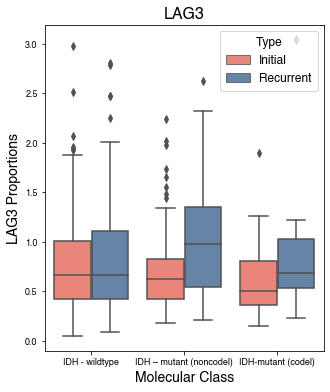

In [22]:
#LAG3
initial_gene_marker = initial_gene_marker[initial_gene_marker.index.isin(final_common)]
recurrence_gene_marker = recurrence_gene_marker[recurrence_gene_marker.index.isin(final_common)]
initial = initial_gene_marker.loc[:, initial_gene_marker.columns == "LAG3"]
initial.columns = ['Initial']
recurrence = recurrence_gene_marker.loc[:, recurrence_gene_marker.columns == "LAG3"]
recurrence.columns = ['Recurrent']
LAG3_data = initial.join(recurrence)
LAG3_final = pd.concat([class_data, LAG3_data], axis=1)
LAG3_final.index.name = 'Mixture'
LAG3_final = LAG3_final.drop(['IDH','1p19qcodel'], axis=1)
LAG3_final = LAG3_final.sort_values(by='Mixture')
LAG3_mdf = pd.melt(LAG3_final.reset_index(), id_vars=('Mixture','Molecular Class'))
plt.figure(figsize=(5,6))
plt.title("LAG3", fontsize=16)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
ax = sns.boxplot(x='Molecular Class', y='value',hue="variable", data=LAG3_mdf)
ax.set_xlabel("Molecular Class", fontsize=14)
ax.set_ylabel("LAG3 Proportions", fontsize=14)  
ax.legend(loc='upper right', fontsize=12,title='Type',title_fontsize=12,borderpad=.5, labelspacing=.5)

In [23]:
m_class = ['IDH - wildtype','IDH – mutant (noncodel)','IDH-mutant (codel)']

for p in m_class:
    specific_progression = LAG3_mdf.loc[LAG3_mdf['Molecular Class'] == p]
    first = specific_progression.loc[specific_progression['variable'] == 'Initial']
    second = specific_progression.loc[specific_progression['variable'] == 'Recurrent']
    print(p)
    print('Between Initial and Recurrence: ')
    print(ranksums(first.iloc[:,3], second.iloc[:,3]))
    print ('--------------------------------')

IDH - wildtype
Between Initial and Recurrence: 
RanksumsResult(statistic=-0.23719802807721949, pvalue=0.8125031660362442)
--------------------------------
IDH – mutant (noncodel)
Between Initial and Recurrence: 
RanksumsResult(statistic=-2.3989378461140203, pvalue=0.016442705402197708)
--------------------------------
IDH-mutant (codel)
Between Initial and Recurrence: 
RanksumsResult(statistic=-1.5819299929208317, pvalue=0.11366555305196807)
--------------------------------
